Hello Kagglers!! Enjoying the competitions and Kernels? I bet you should be. Well, today I am gonna present you something totally new which is totally awesome. If you remember, inspired by the imperative style of **PyTorch**, **TF** developers introduced the **Eager mode** finally. Even though it is out, but I guess most of you wouldn't have tried it (at least on Kaggle Kernels). Yes, you guessed it correctly!! Today's kernel is to show how can you get PyTorch style and the combined power of TF  in Eager mode. **My reaction after using it?**
![LEGENDARY!!](https://media.giphy.com/media/3ohzdIuqJoo8QdKlnW/giphy.gif)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import os
import glob
from pathlib import Path
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.contrib.eager as tfe

#from keras.preprocessing import image
#from skimage.io import imread, imsave, imshow
#from tf.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

np.random.seed(111)
color = sns.color_palette()
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [2]:
#enable the eager mode before doing any operation
tfe.enable_eager_execution()

FMNIST is a very cool dataset. MNIST, in my opinion, has become way too old to experiment and validate models. Replace MNIST with FMNIST!!  

In [3]:
#Read the train and test csv first
train = pd.read_csv('/home/tkornuta/data/fashion-mnist/fashion-mnist_train.csv')
test = pd.read_csv('/home/tkornuta/data/fashion-mnist/fashion-mnist_test.csv')

print("Number of training samples: ", len(train))
print("Number of test samples: ", len(test))

Number of training samples:  60000
Number of test samples:  10000


In [4]:
# Let's look at how the train dataset looks like
train.sample(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
21080,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7352,1,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0
14344,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34161,9,0,0,0,0,0,0,0,0,0,...,0,0,0,135,155,153,160,2,0,0
52086,2,0,0,0,1,0,0,0,0,34,...,1,2,0,0,162,171,86,0,0,0
47658,1,0,0,0,0,0,0,0,0,1,...,4,0,4,0,0,0,0,0,0,0
48633,8,0,0,0,0,0,0,0,0,0,...,125,122,120,121,119,95,17,0,0,0
2219,4,0,0,0,0,0,0,0,0,0,...,119,81,0,0,0,0,0,0,0,0
14078,2,0,0,0,0,0,0,0,0,1,...,1,0,53,133,142,22,0,0,0,0
26608,0,0,0,0,0,0,0,2,68,131,...,74,82,66,10,0,0,0,0,0,0


So, for each sample, there are 785 columns out of which the first column represents the label of the corresponding sample and the other 784 columns are the pixel values of a (28x28) image. Now, let's look at the test dataset too

In [5]:
# Random samples from test data
test.sample(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
6978,4,0,0,0,0,0,0,0,0,0,...,106,55,0,18,160,152,5,0,0,0
7941,4,0,0,0,0,0,0,0,0,0,...,3,0,0,88,131,85,48,0,0,0
9253,4,0,0,0,0,0,0,0,0,0,...,39,195,54,0,6,0,0,0,0,0
5290,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8499,4,0,0,0,0,0,0,0,0,0,...,0,0,0,1,68,94,20,0,0,0
8932,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9791,4,0,0,0,0,0,0,2,0,28,...,89,69,65,0,0,0,0,0,0,0
8559,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,94,42,38,0,0,0
322,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are a total of **10 categories** in FMNIST dataset. I haven't read the description fully (LOL!!), so I will inspect the number of samples for each category myself. Let's do that first.

In [6]:
# Get the count for each label
label_count = train["label"].value_counts()

# Get total number of samples
total_samples = len(train)
y_train
# Make a dictionary for all the labels. 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
         5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

for i in range(len(label_count)):
    label = labels[label_count.index[i]]
    count = label_count.values[i]
    pct = (count / total_samples) * 100
    print("{:<15s}:   {} or {}%".format(label, count, pct))

Ankle Boot     :   6000 or 10.0%
Bag            :   6000 or 10.0%
Sneaker        :   6000 or 10.0%
Shirt          :   6000 or 10.0%
Sandal         :   6000 or 10.0%
Coat           :   6000 or 10.0%
Dress          :   6000 or 10.0%
Pullover       :   6000 or 10.0%
Trouser        :   6000 or 10.0%
T-shirt/top    :   6000 or 10.0%


Have I done something wrong here? Such a balanced dataset, so unrealistic!! Can't believe my eyes as I am seeing such a balanced dataset after such a long time. Let's quickly plot some samples for each category.

In [7]:
# An empty list to collect some samples
sample_images = []

# Iterate over the keys of the labels dictionary defined in the above cell
for k in labels.keys():
    # Get two samples for each category
    samples = train[train["label"] == k].head(2)
    # Append the samples to the samples list
    for j, s in enumerate(samples.values):
        # First column contain labels, hence index should start from 1
        img = np.array(samples.iloc[j, 1:]).reshape(28,28)
        sample_images.append(img)
        
print("Total number of sample images to plot: ", len(sample_images))

Total number of sample images to plot:  20


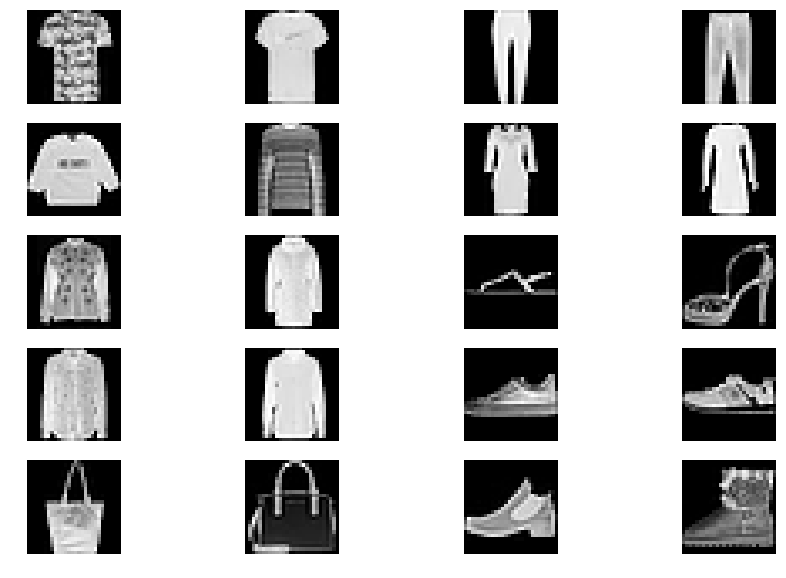

In [8]:
# Plot the sample images now
f, ax = plt.subplots(5,4, figsize=(15,10))

for i, img in enumerate(sample_images):
    ax[i//4, i%4].imshow(img, cmap='gray')
    ax[i//4, i%4].axis('off')
plt.show()    

Ha!! Nice plot. Isn't it? 

## Preprocessing of data

In [9]:
# Separate the labels from train and test dataframe
tr_labels = train["label"]
ts_labels = test["label"]

# Drop the labels column from train dataframe as well as test dataframe
train = train.drop(["label"], axis =1)
test = test.drop(["label"], axis=1)

# Split the training dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(train, tr_labels, test_size=0.2, random_state=111)
print("Number of samples in the train set: ", len(X_train))
print("Number of samples in the validation set: ", len(X_valid))

# Just a consistency check
print("Train and validation shapes: ", end=" ")
print(X_train.shape,y_train.shape,X_valid.shape, y_valid.shape)

Number of samples in the train set:  48000
Number of samples in the validation set:  12000
Train and validation shapes:  (48000, 784) (48000,) (12000, 784) (12000,)


The pixel values in the dataset has been obtained after flattening the image pixels. There are 784 columns and each  image is  28x28 grayscale image. Let's reshape our data properly.  Also, there are 10 categories that we want to classify, we will use the `to_categorical` method available in keras for converting the labels to OHE 

In [10]:
# Reshape the data values
X_train = np.array(X_train.iloc[:, :]).reshape(len(X_train),28,28,1)
X_valid = np.array(X_valid.iloc[:, :]).reshape(len(X_valid), 28, 28,1)
X_test = np.array(test.iloc[:,:]).reshape(len(test), 28, 28,1)

# Some more preprocessing
X_train = X_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)
X_test = X_test.astype(np.float32)

train_mean = X_train.mean()

# Mean subtraction from pixels
X_train -= train_mean
X_valid -= train_mean
X_test -= train_mean

# Normalization
X_train /=255.
X_valid /=255.
X_test /=255.

In [11]:
# One Hot Encoding(OHE)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10).astype(np.int8)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=10).astype(np.int8)

print("X_train shape: {}, y_train shape: {} ".format(X_train.shape, y_train.shape))
print("X_valid shape: {}, y_valid shape: {} ".format(X_valid.shape, y_valid.shape))
print("X_test shape: ", X_test.shape)


X_train shape: (48000, 28, 28, 1), y_train shape: (48000, 10) 
X_valid shape: (12000, 28, 28, 1), y_valid shape: (12000, 10) 
X_test shape:  (10000, 28, 28, 1)


Great. Before moving to building blocks of our architecture, let's define a simple data generator for our model first

In [12]:
# A simple data generator
def data_gen(data, labels, batch_size=8):
    # Get total number of samples in the data
    n = len(data)
    
    # Define two numpy arrays for containing batch data and labels
    batch_data = np.zeros((batch_size, 28, 28, 1), dtype=np.float32)
    batch_labels = np.zeros((batch_size,10), dtype=np.int8)
    
    # Get a numpy array of all the indices of the input data
    indices = np.arange(n)
    
    # Initialize a counter
    i =0
    while True:
        np.random.shuffle(indices)
        # Get the next batch 
        next_batch = indices[(i*batch_size):(i+1)*batch_size]
        for j, idx in enumerate(next_batch):
            batch_data[j] = data[idx]
            batch_labels[j] = labels[idx]
        
        yield batch_data, batch_labels
        i +=1  

In [13]:
# Train data generator
#train_data_gen = data_gen(X_train, y_train)
#inputs, targets = next(train_data_gen)

## Eager mode begins!! 

Wait a second. What is **Eager execution** at all?

(From Tensorflow docs)

Eager execution is a feature that makes TensorFlow execute operations immediately: concrete values are returned, instead of a computational graph to be executed later.

As a result, enabling eager execution provides:
* A NumPy-like library for numerical computation with support for GPU acceleration and automatic differentiation.
*  A flexible platform for machine learning research and experimentation.

It gives you an imperative way of defining your models. Now you may ask: **Why on the earth does it matter**? 
Well, there are a lot of reasons but the most simple one is this:

***I want to write and execute everything as if I am writing a pure Python code, no tf.Session() and other things***


### What is the best way to define a model?

You can define your model as you want. You could define your model inside a function or you could define it inside a class, it's totally up to you. If you ask me, I like to keep associated things together and this is where I love to write OOP. The following point summarizes how I have defined the model for this notebook.

* Define a class FMNIST
   * The constructor part (__init__): You should define all the layers that you are gonna use in your network here.  It is **highly recommended** to use high-level **tf.layers** API for defining your layers
   * Other methods that like fit/predict, that you want to use for training and inference purposes. In the code below, I have defined just the predict function for the sake of simplicity here. You can define fit and predict both separately if you want.
   
 * Define your cost function and your metric function(like accuracy, precision, etc) 
 * Instantiate your model
 * Instantiate your optimizer
 * Define your gradient calculations (I will explain this later in the notebook)
 * Train and validate your network

### Model

In [14]:
# Class represnting our model
class FMNIST(object):
    def __init__(self, data_format):
        # Set the input shape according to the availability of GPU 
        if data_format == 'channels_first':
            self._input_shape = [-1, 1, 28, 28]
        else:
            self._input_shape = [-1, 28, 28, 1]
        
        # Start defining the type of layers that you want in your network
        self.conv1 = tf.layers.Conv2D(32, 3, 
                                      activation=tf.nn.relu, 
                                      padding='same', 
                                      data_format=data_format)
        
        self.maxpool = tf.layers.MaxPooling2D((2,2), (2,2), 
                                            padding='same', 
                                            data_format=data_format)
        
        self.conv2 = tf.layers.Conv2D(64, 3, 
                                      activation=tf.nn.relu, 
                                      padding='same', 
                                      data_format=data_format)
        self.conv3 = tf.layers.Conv2D(128, 3, 
                                      activation=tf.nn.relu, 
                                      padding='same', 
                                      data_format=data_format)
        
        self.dense1 = tf.layers.Dense(1024, activation=tf.nn.relu)
        self.dense2 = tf.layers.Dense(512, activation=tf.nn.relu)
        self.dropout = tf.layers.Dropout(0.5)
        self.dense3 = tf.layers.Dense(10)
        
        
    #Combine the layers to form the architecture
    def predict(self, inputs, drop=False):
        x = tf.reshape(inputs, self._input_shape)
        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.maxpool(x)
        x = self.conv3(x)
        x = self.maxpool(x)
        x = tf.layers.flatten(x)
        x = self.dense1(x)
        x = self.dropout(x, training=drop) #enable at training and disable at testing
        x = self.dense2(x)
        x = self.dropout(x, training=drop)
        x = self.dense3(x)
        return x

### Cost function/loss function

In [15]:
# There are 10 categories, hence we will be using the cross-entropy loss here 
def loss(model, inputs, targets, drop=False):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
                          logits=model.predict(inputs, drop=drop), labels=targets))

### Metric calculation

In [16]:
# In our case, accuracy will be the metric that we are going to use for evaluation
def compute_accuracy(predictions, labels):
    model_pred = tf.argmax(predictions, axis=1,output_type=tf.int64)
    actual_labels = tf.argmax(labels, axis=1, output_type=tf.int64)
    return tf.reduce_sum(tf.cast(tf.equal(model_pred, actual_labels),dtype=tf.float32)) / float(predictions.shape[0].value)

There are four things that are going on in the next cell.
1.  Device selection: If GPU is there, data format should be NCHW as it is more optimized for GPU operations. If only CPU is there, the data format should be NHWC as it works better this way on CPU.

2. Model instantiation

3. Optimizer selection

4. Gradient calculations: Although you can write your own function that calculates the gradient for each trainable variable for backpropagation but as the number of variables grows it can be hard to write one. The good thing is that TF provides implicit automatic differentiation. The only thing that you need to do is to pass your loss function name as a parameter to the `tfe.implicit_gradient()` method.

In [17]:
# Device selection
device = "gpu:0" if tfe.num_gpus() else "cpu:0"

# Get an instance of your model
model = FMNIST('channels_first' if tfe.num_gpus() else 'channels_last')

# Define an optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4)

# Automatic gradient calculation
grad = tfe.implicit_gradients(loss)

 ### Training and Validation

In [18]:
# Define a batch size
batch_size = 32

# Train data generator
train_data_gen = data_gen(X_train, y_train)
# Validation data generator
valid_data_gen = data_gen(X_valid, y_valid)

# Get the number of batches
nb_tr_batches = len(X_train) // batch_size
nb_val_batches = len(X_valid) // batch_size
print("Number of train and validation batches: {}, {}".format(nb_tr_batches, nb_val_batches))

# Define number of epochs for which you want to train your model
nb_epochs = 4

# Train and validate
for i in range(nb_epochs):
    print("\n========== Epoch: {} ==============================\n".format(i+1))
    with tf.device(device):
        epoch_avg_loss = []
        epoch_avg_acc = []
        for j in range(nb_tr_batches):
            inputs, targets = next(train_data_gen)
            optimizer.apply_gradients(grad(model, inputs, targets))
            if j % 500 == 0:
                batch_loss = loss(model, inputs, targets, drop=True).numpy()
                batch_acc = (compute_accuracy(model.predict(inputs, drop=True), targets).numpy())*100
                epoch_avg_loss.append(batch_loss)
                epoch_avg_acc.append(batch_acc)
                print("Step {:<5s} ------> Loss: {:.4f}".format(str(j), batch_loss))
        
        val_loss = loss(model, X_valid, y_valid).numpy()
        val_acc = (compute_accuracy(model.predict(X_valid), y_valid).numpy())*100
        print("\ntrain_loss: {:.4f}  train_acc: {:.2f}%".format(np.mean(epoch_avg_loss), np.mean(epoch_avg_acc)))        
        print("val_loss: {:.4f}   val_acc: {:.2f}%".format(val_loss, val_acc))

Number of train and validation batches: 1500, 375

========== Epoch: 1 ==============================

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Step 0     ------> Loss: 2.2773
Step 500   ------> Loss: 0.8248
Step 1000  ------> Loss: 0.6597

train_loss: 1.2539  train_acc: 75.00%
val_loss: 0.5498   val_acc: 79.07%

========== Epoch: 2 ==============================

Step 0     ------> Loss: 0.7578
Step 500   ------> Loss: 0.6308
Step 1000  ------> Loss: 0.0292

train_loss: 0.4726  train_acc: 75.00%
val_loss: 0.4348   val_acc: 83.55%

========== Epoch: 3 ==============================

Step 0     ------> Loss: 0.0966
Step 500   ------> Loss: 0.0214
Step 1000  ------> Loss: 0.5774

train_loss: 0.2318  train_acc: 87.50%
val_loss: 0.3906   val_acc: 85.61%

========== Epoch: 4 ==============================

Step 0     ------> Loss: 0.5559
Step 50

I trained the model for 4 epochs only. You can train it for more. Also, I didn't put `EarlyStopping` here to put a check for overfitting, but you should definitely try it out.

## Testing

Let's do prediction on some of the test set samples

In [19]:
test_samples = X_test[:10]
test_labels = ts_labels[:10]
print(test_samples.shape, test_labels.shape)

(10, 28, 28, 1) (10,)


In [20]:
prob = model.predict(inputs=test_samples).numpy()
predicted_labels = list(tf.argmax(prob, axis=1,output_type=tf.int64).numpy())
print("True labels:     ", test_labels.tolist())
print("Predicted labels: ", predicted_labels)

True labels:      [0, 1, 2, 2, 3, 2, 8, 6, 5, 0]
Predicted labels:  [0, 1, 2, 6, 3, 0, 8, 6, 5, 0]


Pretty good results. Ha!!

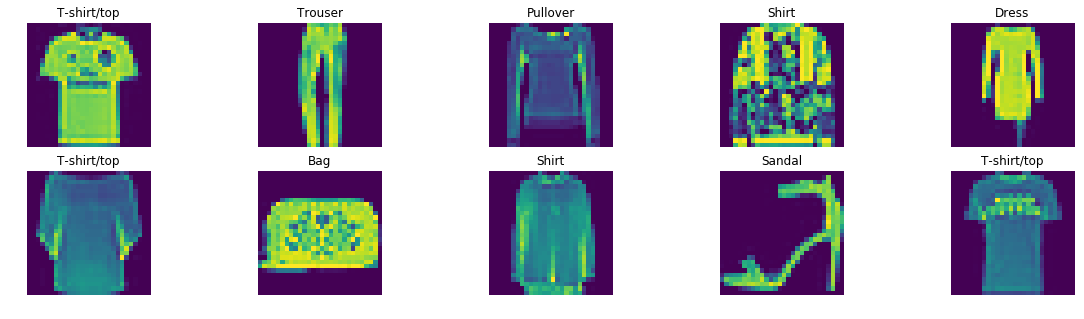

In [21]:
# Let's visualize the results
f, ax = plt.subplots(2,5, figsize=(20,5))

for i in range(10):
    img = X_test[i].reshape(28,28)
    ax[i//5, i%5].imshow(img)
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title(labels[predicted_labels[i]])
plt.show()    

That's it folks!! As you can see, **Eager** is the way to go and I think TF guys are working hard to make it happen. That being said, **Eager mode** is still in beta and requires a lot of optimization. Hopefully, the next version of TF will ship with awesome functionalities. 

### TIPS:
1. Integrate **Dataset API** in this code, to get a much better generator that can do data augmentation on the fly.
2. Copy this notebook and run on Google Colab
3. Compare the execution speed of plain TF with code for eager mode
4. Train a **GAN** using eager execution

If you want me to do some of these in the Kaggle Kernels, let me know about it in the comments section. If you find anything wrong, or if you want to provide some suggestion, please do in the comments section below. Also, **please upvote if you liked the kernel**